# Police Shootings EDA

TODO: intro

Let's load the packages we'll need, then load the dataset and take a look at it.

In [51]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson 

# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()

In [52]:
PK = pd.read_csv('../input/PoliceKillingsUS.csv', encoding='latin1')

In [53]:
PK.sample(n=10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
177,883,Edixon Franco,10/03/15,shot,sword,37.0,M,H,Ontario,CA,True,other,Car,False
1519,1708,Donald S. Myers,13/07/16,shot,gun,32.0,M,W,Flagstaff,AZ,False,undetermined,Foot,True
96,134,Joseph Paffen,08/02/15,shot,gun,46.0,M,W,Orange County,FL,False,attack,Not fleeing,False
274,355,Mack Long,12/04/15,shot,gun,36.0,M,B,Indianapolis,IN,False,attack,Foot,True
1712,1919,Christopher Sowell,28/09/16,shot,undetermined,32.0,M,B,Philadelphia,PA,False,attack,Not fleeing,False
638,771,Julian Hoffman,23/08/15,shot,toy weapon,21.0,M,W,Brick Township,NJ,False,attack,Not fleeing,False
812,956,Kobvey Igbuhay,26/10/15,shot,unarmed,18.0,M,O,Tampa,FL,False,attack,Foot,False
2159,2406,Dennis Todd Rogers,07/03/17,shot and Tasered,sharp object,41.0,M,B,Ladera Heights,CA,False,other,Not fleeing,False
435,551,Zane Terryn,14/06/15,shot,gun,15.0,M,W,Cocoa,FL,True,attack,Not fleeing,False
689,820,Austin Wilburly Reid,10/09/15,shot,gun,32.0,M,W,Lodi,CA,False,attack,Foot,False


In [ ]:
for col in PK:
    print(col, '\n', PK[col].describe(), '\n')

All the people killed by police in the dataset were shot, but around 7% were also tasered.

In [ ]:
# Plot the manner of death
ax = sns.countplot(x='manner_of_death', data=PK)
plt.title('Manner of death')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.show()

The dataset also contains information about what type of weapon (if any) the individual killed was using.  The most common weapon by far was a gun followed by a knife, or a vehicle.  Though an alarmingly high proportion of individuals shot by police were unarmed or "armed" with a toy weapon.

In [ ]:
# Plot the 20 most common weapons used by individuals shot
plt.figure(figsize=(4.7, 5))
ax = sns.countplot(y='armed', data=PK,
                   order = PK.armed.value_counts().iloc[:20].index)
plt.title('Weapon used by person shot')
plt.show()

Most of the individuals shot and killed by police were between the ages of 20 and 40, with very few older than 80 or younger than 16.  Though there are 12 children under the age of 16 that were killed by police.

In [ ]:
sns.distplot(PK.age[~np.isnan(PK.age)])
plt.title('Age of individuals shot by police')
plt.show()

In [ ]:
PK[PK.age<16]

Most of the individuals shot by police were male.

In [ ]:
# Plot police killings by gender
ax = sns.countplot(x = "gender", data = PK,
                   order = PK.gender.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Gender')
plt.show()

According to the [US census](https://www.census.gov), the population of the United States is 50.8% female and 49.2% male.  How does this distribution match up to the distribution of police killings.  That is - if police were killing people completely at random, what would the killings distribution look like?

First let's define a function which will return a dataframe with the actual percentages and also the population percentages for any per-group count.

In [ ]:
def ActualVsPopulation(df, pop, group):
    """Get dataframe with actual per-group percentage vs population group percentage"""
    d = {group: [], 'type': [], 'percent': []}
    tot_pop = float(sum(pop.values()))
    for g in df[group].dropna().unique(): #for each group

        # Actual percentages
        d[group].append(g)
        d['type'].append('Killings')
        d['percent'].append(100*df[df[group]==g].id.count()/df.id.count())

        # Percentages if statistic followed population distribution
        d[group].append(g)
        d['type'].append('Population') #based on population percentage
        d['percent'].append(100*pop[g]/tot_pop)
        
    return pd.DataFrame(data=d)

Now we can see the actual killings distribution versus the population distribution:

In [ ]:
# Plot percent police killings by gender vs population percentages
pop_g = {'M': 49.2, 'F': 50.8} #percent population by gender https://www.census.gov/quickfacts/fact/table/US
df = ActualVsPopulation(PK, pop_g, 'gender')
sns.barplot(x="gender", y="percent", hue="type", data=df, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by Gender)')
plt.show()

Next we'll plot the number of police killings by race.

In [ ]:
# Plot police killings by race
ax = sns.countplot(x="race", data=PK,
                   order = PK.race.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Race')
plt.show()

How does this match up to the population distribution?

In [ ]:
# Plot percent police killings by race vs population percentages
pop_r = {'W': 60.7, # white - % population by race https://www.census.gov/quickfacts/fact/table/US
         'B': 13.4, # black or african american
         'H': 18.1, # hispanic or latino
         'A': 5.8,  # asian
         'N': 1.5,  # american indian, alaska native, naitive hawaiian, and other pacific islander
         'O': 0.5}  # other
df = ActualVsPopulation(PK, pop_r, 'race')
sns.barplot(x="race", y="percent", hue="type", data=df,
            order = PK.race.value_counts().index, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by Race)')
plt.show()

As you can see above, Black and Other are the only two racial categories with *more* police killings than would be expected if police killings were random.  And that effect isn't small - there are nearly *twice* as many police killings of black individuals than would be expected if these killings were random.  

Later we'll determine which states show more racially-biased police killings, but first let's plot the number of police killings by state:

In [ ]:
plt.figure(figsize=(6, 13))
sns.countplot(y="state", 
              data=PK,
              order=PK.state.value_counts().index)
plt.title('Police Killings By State')
plt.show()

And how does this match up to the population distribution of the states?

In [ ]:
# Population for each state 
# https://www.census.gov/data/datasets/2017/demo/popest/state-total.html
pop_s ={'AL': 4874747,
        'AK': 739795,
        'AZ': 7016270,
        'AR': 3004279,
        'CA': 39536653,
        'CO': 5607154,
        'CT': 3588184,
        'DE': 961939,
        'DC': 693972,
        'FL': 20984400,
        'GA': 10429379,
        'HI': 1427538,
        'ID': 1716943,
        'IL': 12802023,
        'IN': 6666818,
        'IA': 3145711,
        'KS': 2913123,
        'KY': 4454189,
        'LA': 4684333,
        'ME': 1335907,
        'MD': 6052177,
        'MA': 6859819,
        'MI': 9962311,
        'MN': 5576606,
        'MS': 2984100,
        'MO': 6113532,
        'MT': 1050493,
        'NE': 1920076,
        'NV': 2998039,
        'NH': 1342795,
        'NJ': 9005644,
        'NM': 2088070,
        'NY': 19849399,
        'NC': 10273419,
        'ND': 755393,
        'OH': 11658609,
        'OK': 3930864,
        'OR': 4142776,
        'PA': 12805537,
        'RI': 1059639,
        'SC': 5024369,
        'SD': 869666,
        'TN': 6715984,
        'TX': 28304596,
        'UT': 3101833,
        'VT': 623657,
        'VA': 8470020,
        'WA': 7405743,
        'WV': 1815857,
        'WI': 5795483,
        'WY': 579315}

# Plot percent police killings by state vs population percentages
df = ActualVsPopulation(PK, pop_s, 'state')
plt.figure(figsize=(6, 13))
sns.barplot(y="state", x="percent", hue="type", data=df,
            order = PK.state.value_counts().index, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by State)')
plt.show()

Instead of plotting both the actual killings against the population distributions, we can compute a single number - a score which tells us how likely it is to see a number of killings (for a state or race) if killings were random, given the population distribution.  We'll use a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) to model the likelihood of observing the number of killings given the number of people in a certain group (state or race).  

A Poisson distribution models the likelihood of observing some number of events ($k$ events) within a set time window, given the constant (or expected) rate for which they are thought to occur ($\lambda$ events per time window).  We want to know the likelihood of the number of police killings of people from a given state or of a given race, so we'll set the $\lambda$ parameter to be the number of individuals in a certain population (race or state) which we would expect to be killed by police given the national average, and find the probability at $k=$ the number of people killed by police in that population.   If police killings don't depend on state or race, then the number of people killed by police in that population ($k$) should be proportional to the population ($\lambda$).  The further $k$ is from $\lambda$, the less likely it is that police killlings are biased in that population.

But we don't just want to find the *likelihood* that police killings are biased in different populations, we also want to know the *direction* in which they are biased.  That is, are there more or less police killings of people in a certian population than would be expected in that population if killings were random?  Therefore, we'll use the cumulative probability of the Poisson distribution, which will tell us the likelihood of observing a given number of killings *or less*.  That way, if the value of the cumulative poisson distribution is closer to 0, that means there were less killings of a certain population than would be expected if killings were random.  If the value is closer to 1, there were more killings than would be expected if killings were random.  And if the value is around 0.5, police shootings of people in that population were relatively unbiased.

The cumulative probability of the Poisson distribution can be computed by:

$$
p(X \leq k) = e^{-\lambda} \sum_{i=0}^{\left \lfloor{k}\right \rfloor} \frac{\lambda^i}{i !}
$$

where again $k$ is the number of observed killings and $\lambda$ is the expected number of killings if killings were random (given the population distribution).

If there are $N_p$ individuals in a population, $N_k$ people shot and killed by police in the USA, and $N_{USA}$ people in the USA, we would expect to see, on average,

$$
\lambda = N_p \frac{N_k}{N_{USA}}
$$

people in that population shot by police if shootings were random.  Then the Poisson and cumulative Poisson distributions tell us how likely it is, if killings were random, to observe the actual number of people killed in that population:

In [ ]:
lam = 10 #lambda, the "expected" number
k1 = 5   #k, the actual number, when more than expected
k2 = 15  #k, the actual number, when less than expected

xx = np.arange(0,30)
ppd = poisson.pmf(xx, lam) #poisson probability distribution
cppd = poisson.cdf(xx, lam) #cumulative poisson distribution

p_k1 = poisson.pmf(k1, lam) #probability of observing k1
p_k2 = poisson.pmf(k2, lam) #and k2
c_k1 = poisson.cdf(k1, lam) #cumulative probability of observing k1
c_k2 = poisson.cdf(k2, lam) #and k2

plt.figure()
plt.plot(xx,ppd, 'o')
plt.plot([k1, k1], [0, p_k1], 'g--')
plt.plot([0, k1], [p_k1, p_k1], 'g--')
plt.plot([k2, k2], [0, p_k2], 'r--')
plt.plot([0, k2], [p_k2, p_k2], 'r--')
plt.title(r'Poisson Distribution, $\lambda=10$')
plt.xlabel('k')
plt.ylabel('Probability')
plt.xlim([0, 30])
plt.ylim([0, 0.14])
plt.show()

plt.figure()
plt.plot(xx,cppd, 'o')
c_k1 = poisson.cdf(k1, lam)
plt.plot([k1, k1], [0, c_k1], 'g--')
plt.plot([0, k1], [c_k1, c_k1], 'g--')
plt.plot([k2, k2], [0, c_k2], 'r--')
plt.plot([0, k2], [c_k2, c_k2], 'r--')
plt.title(r'Poisson Cumulative Distribution, $\lambda=10$')
plt.xlabel('k')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 30])
plt.ylim([0, 1])
plt.show()

We can see that when there are less killings in a population than would be expected if killings were random, the cumulative probability value approaches 0, while when there are more than expected, the cumulative probability value approaches 1.

Let's plot that metric for each state, to see which states have less police killings than the national average ($p(X \leq k) \lessapprox 0.5$) and which states have more police killings than the national average ($p(X \leq k) \gtrapprox  0.5$).  I've plotted the bars such that they are anchored at 0.5 to make this distinction more clear.

In [ ]:
# Compute the cumulative Poisson distribution value for each state
natl_rate = PK.shape[0]/sum(pop_s.values()) #national average rate of police shootings per person
cum_poisson_vals = [] #to store cumulative poisson values
for state in pop_s.keys():
    lam = natl_rate*pop_s[state] #num shootings for this state if rate matched national avg (lambda)
    k = PK[PK.state==state].shape[0] #actual number of shootings in this state
    cum_poisson_vals.append(poisson.cdf(k, lam))

# Plot cumulative Poisson distribution values
plt.figure(figsize=(6, 13))
EK = pd.DataFrame(data={'state': list(pop_s.keys()), 
                        'cum_poisson': cum_poisson_vals})
EK.sort_values('cum_poisson', inplace=True)
y = np.arange(len(EK.state))
plt.barh(y, EK.cum_poisson-0.5, left=0.5)
ax = plt.gca()
ax.set_yticks(y)
ax.set_yticklabels(EK.state)
ax.invert_yaxis()
plt.plot([0.5, 0.5], [y[0]-1, y[-1]+1], 'k', linewidth=2)
plt.title('Police Shootings: Cumulative Probability\ngiven national average, by State')
plt.ylabel('State')
plt.xlabel('Cumulative Poisson Probability')
plt.text(0.505, y[0]-1.5, 
         r'Less shootings $\leftarrow$ $\rightarrow$ More shootings',
         horizontalalignment='center', color='gray')
plt.show()

So, Arizona has the highest frequency of police shootings given its population, while New York has the least.

We can plot the same statistic per race to see how racially biased police shootings are.

In [ ]:
# Compute the cumulative Poisson distribution value for each race
cum_poisson_vals = []
for race in pop_r.keys():
    lam = PK.shape[0]*pop_r[race]/100 #num shootings of people of this race if killings were random (lambda)
    k = PK[PK.race==race].shape[0] #actual number of shootings of people of this race
    cum_poisson_vals.append(poisson.cdf(k, lam))

# Plot cumulative Poisson distribution values
plt.figure()
EK = pd.DataFrame(data={'race': list(pop_r.keys()), 
                        'cum_poisson': cum_poisson_vals})
EK.sort_values('cum_poisson', inplace=True)
y = np.arange(len(EK.race))
plt.barh(y, EK.cum_poisson-0.5, left=0.5)
plt.plot([0.5, 0.5], [y[0]-1, y[-1]+1], 'k', linewidth=2)
ax = plt.gca()
ax.set_yticks(y)
ax.set_yticklabels(EK.race)
ax.invert_yaxis()
plt.title('Police Shootings: Cumulative Probability\ngiven national average, by Race')
plt.ylabel('Race')
plt.xlabel('Cumulative Poisson Probability')
plt.text(0.506, y[0]-0.75, 
         r'Less shootings $\leftarrow$ $\rightarrow$ More shootings',
         horizontalalignment='center', color='gray')
plt.show()

This shows that police shootings are extremely racially biased: there is a near-zero probability of observing so few shootings of white and asian individuals if shootings were random, and a near-zero probability of observing so *many* shootings of black and other individuals if shootings were random.

To examine the dates of the shootings, we'll have to convert the dates which were loaded as general objects into datetimes, and get the month (of the year) for each shooting, and the number of months since the start of the datset for each shooting.

In [54]:
# Convert date from object to datetime
PK.date = pd.to_datetime(PK.date)

And now we can see how the shooting frequency has changed over time:

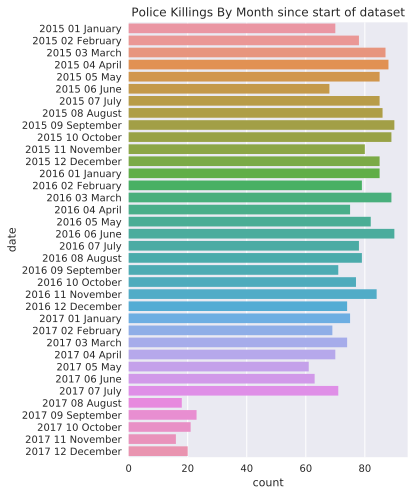

In [79]:
# Plot shootings by month
plt.figure(figsize=(5,8))
sns.countplot(y=PK.date.dt.strftime('%Y %m %B'), 
              order=sorted(PK.date.dt.strftime('%Y %m %B').unique()))
plt.title('Police Killings By Month since start of dataset')
plt.show()

I'm not sure why there is a sudden decrease around August 2017, but it seems likely it's because those events weren't recorded in the database yet, and not because police shootings suddenly dropped four-fold.  Unfortunately, this makes me wonder whether there's a recency effect in the data (i.e., more recent shootings are less likely to be reported in the dataset, perhaps because investigation details hadn't yet been made public, etc).  It looks like there may be a downward trend in the number of shootings, which is good, but the recency effect (if there is one) may explain that trend.

We can also look at the number of killings as a function of the day of the week.

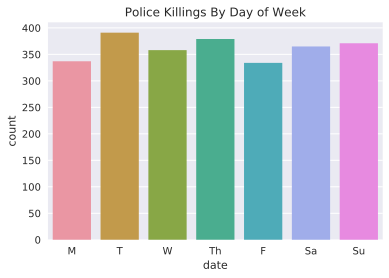

In [80]:
# Plot shootings by day of week
dow_map={0:'M', 1:'T', 2:'W', 3:'Th', 4:'F', 5:'Sa', 6:'Su'}
sns.countplot(x=PK.date.dt.dayofweek.map(dow_map), order=dow_map.values())
plt.title('Police Killings By Day of Week')
plt.show()


## TODO: 
- signs of mental illness
- fleeing
- body camera
- body camera by state? (which states are good about having body cameras on their police?)
- Weather?
- Correlation w/ metrics in those census datasets?